# Exercício 2

1. Primeiro, foi definido as listas de $ x_i, y_i, z_i $ e um data frame para vizualização

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#definicao do conjunto de dados 
t = [0.000, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000]
x = [0.7416, 0.2685, 0.3333, 0.3982, -0.0749, -0.3089, 0.3333, 0.9756, 0.7416]
y = [0.7416, 0.9756, 0.3333, -0.3089, -0.0749, 0.3982, 0.3333, 0.2685, 0.7416]
z = [-0.4832, -0.2441, 0.3334, 0.9107, 1.1498, 0.9107, 0.3334, -0.2441, -0.4832]

#construção do data frame com o conjunto de dados
dados = pd.DataFrame([t, x, y, z]).set_index([['t', 'x', 'y', 'z']])
dados


,0,1,2,3,4,5,6,7,8
t,0.0000,0.1250,0.2500,0.3750,0.5000,0.6250,0.7500,0.8750,1.0000
x,0.7416,0.2685,0.3333,0.3982,-0.0749,-0.3089,0.3333,0.9756,0.7416
y,0.7416,0.9756,0.3333,-0.3089,-0.0749,0.3982,0.3333,0.2685,0.7416
z,-0.4832,-0.2441,0.3334,0.9107,1.1498,0.9107,0.3334,-0.2441,-0.4832


Em seguida, foi definido a função <em>coef_interpolação</em> a qual encontra os coeficientes $\alpha_0, \alpha_1, ..., \alpha_n$ do polinômio de interpolação entre $t_i$ e $x_i, y_i$ ou $z_i$ pelo método de Newton. 

O polinômio é definido por: $$ P(x) = \alpha_0 + \alpha_1(x-x_0) + \alpha_2(x-x_0)(x-x_1) + ... + \alpha_n(x-x_0)(x-x_1)...(x-x_n)$$

Para realizar a interpolação dos conjuntos de dados, foi utilizado o método de Newton, o qual é baseado nas diferenças divididas de ordem k, denotadas por: $$ f[x_0, ..., x_k] := \frac{f[x_1, ..., x_k] - f[x_0, ..., x_k-1]}{x_k - x_0}    $$

Sabe-se que, por exemplo: $$ f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} =\frac{f[x_2, x_1]-f[x_1, x_0]}{x_2-x_1} $$

Assim, é possível construir $f[x_2, x_1, x_0]$ por meio de $f[x_2, x_1]$ e $f[x_1, x_0]$. Definindo uma matriz quadrada $M_n$, sendo $n$ o número de pontos a serem interpolados, e preenchendo a primeira coluna com os pontos de $t_i$ e $x_i, y_i$ ou $z_i$, é possível encontrar as diferenças divididas de Newton.

Para isso, calcula-se $f[x_1, x_0]$ e $f[x_2, x_1, x_0]$ utilizando os valores de 

In [151]:
def coef_interpolacao(a, b):
    #criacao da matriz de zeros a ser preenchida
    n = len(a)
    matriz = np.zeros([n, n])
    #primeira coluna são os termos juntos ao x^0
    matriz[:,0] = b

    #metodo das diferenciais de newton
    for c in range(1, n):
        for l in range(n-c):
            matriz[l][c] = (matriz[l+1][c-1] - matriz[l][c-1]) / (a[l+c] - a[l])

    #primeira linha da matriz representa os coeficientes em ordem 
    coef = matriz[0]
    return coef

#pd.DataFrame(coef_interpolacao(t, x))


In [152]:
def polinomio_interpolado(coef, t, a):
    n = len(t)-1

    y = coef[0]
    for i in range(1, n):
        alpha = coef[i]
        for j in range(0, i):
            alpha = alpha*(a-t[j])

        y += alpha

    return y    


In [167]:
#criação dos coeficientes para cada variável
poly_x = coef_interpolacao(t, x)
poly_y = coef_interpolacao(t, y)
poly_z = coef_interpolacao(t, z)

#criacao do conjunto de t a ser 
t_j = np.arange(1, 51)/50

x_j = polinomio_interpolado(poly_x, t, t_j)
y_j = polinomio_interpolado(poly_y, t, t_j)
z_j = polinomio_interpolado(poly_z, t, t_j)

saida = pd.DataFrame([t_j, x_j, y_j, z_j]).set_index([['t_j', 'x_j', 'y_j', 'z_j']])
saida

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
t_j,0.020000,0.040000,0.060000,0.080000,0.100000,0.120000,0.140000,0.160000,0.180000,0.200000,...,0.820000,0.840000,0.860000,0.880000,0.900000,0.920000,0.940000,0.960000,0.980000,1.0000
x_j,0.730542,0.657631,0.556343,0.450566,0.356257,0.282938,0.235029,0.213033,0.214573,0.235294,...,0.799142,0.890492,0.951680,0.979266,0.972938,0.936596,0.879589,0.818110,0.776746,0.7902
y_j,0.745322,0.798818,0.868591,0.931031,0.970732,0.978960,0.952293,0.891405,0.799998,0.683870,...,0.213717,0.212120,0.234415,0.283243,0.358463,0.456130,0.567342,0.676923,0.761967,0.7902
z_j,-0.475864,-0.456450,-0.424934,-0.381597,-0.326989,-0.261898,-0.187322,-0.104438,-0.014571,0.080836,...,-0.012858,-0.102612,-0.186095,-0.262510,-0.331401,-0.392726,-0.446931,-0.495034,-0.538713,-0.5804


2. A partir dos valores obtidos no item anterior, foi feito a iteração de $ S_j = x_j + y_j + z_j$ para todos os valores de $t_j$ calculados no item anterior. Assim, obteve-se o array <em>test</em> que contém todos os valores de $S_j$. Como observado, todas os valores obtidos na lista foram muito próximos de 1, logo, pode-se dizer que aa interpolação foi implementada corretamente. 

In [172]:
teste = []

for i in range(50):
    k = x_j[i] + y_j[i] + z_j[i]
    teste.append(k)
    
testado = pd.DataFrame(teste).set_index([t_j]).T
testado

,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20,...,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.00
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


3. Com conjuntos de dados $x_j, y_j$ e $z_j$ foi plotado o gráfico a parir da biblioteca matplotlib.

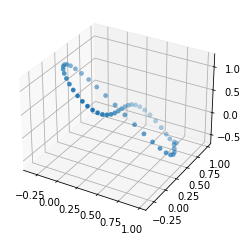

In [173]:
#plot do gráfico que mostra a trajetória da particula 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x_j, y_j, z_j, linewidth=0.2, antialiased=True)